# `Case study on Credit Risk`


## `Context: `
Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to 
be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.


## `Objective:`
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## `Attributes Information:`

* Variable:	      Description
* Loan_ID:	          Unique Loan ID
* Gender:	          Male/ Female
* Married:	          Applicant married (Y/N)
* Dependents:	      Number of dependents
* Education:	      Applicant Education (Graduate/ Under Graduate)
* Self_Employed:	  Self employed (Y/N)
* ApplicantIncome:	  Applicant income
* CoapplicantIncome: Coapplicant income
* LoanAmount:	      Loan amount in thousands
* Loan_Amount_Term:  Term of loan in months
* Credit_History:	  credit history meets guidelines
* Property_Area:	  Urban/ Semi Urban/ Rural
* Loan_Status:	      Loan approved (Y/N)



----------------------

## `Index`

----------------------
- <a href = #link1>Import Libraries and Load Dataset </a>


- <a href = #link2>Univariate Analysis</a> 


- <a href = #link3>Null Values Treatment</a>


- <a href = #link4>Bivariate Analysis</a> 


- <a href = #link6>Model building using Logistic Regression from Sklearn</a>


- <a href = #link8>Business Insights</a>

# `Let's start coding!`

## <a id = "link1"></a> Import Libraries and Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [3]:
# Read Dataset
df_orig = pd.read_csv('CreditRisk.csv')
df_orig.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [4]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [5]:
df_orig.shape

(614, 13)

In [6]:
df = df_orig.copy()

In [7]:
# Remove ID Column
df=df.drop('Loan_ID',axis=1)


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,141.166124,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,88.340630,65.12041,0.364878,0.463973
min,150.000000,0.000000,0.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [9]:
# Look for missing values and impute
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Check for Credit History missing values
df[df["Credit_History"].isnull()].head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,1,Not Graduate,No,3596,0.0,100,240.0,NaN,Urban,1
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151,360.0,NaN,Semiurban,0
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201,360.0,NaN,Urban,0
42,Male,Yes,0,Graduate,No,2400,0.0,75,360.0,NaN,Urban,1
79,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130,360.0,NaN,Semiurban,1


In [11]:
# Look for column distributions
for col in list(df.columns[df.dtypes=='object']):
    print(df[col].value_counts(),'\n')

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 



In [12]:
#Impute missing values
#df=df.fillna('0')
#df=df.replace({'NaN':df.median()})

for col in ['Dependents','Self_Employed']:
    df[col].fillna(df[col].mode()[0],inplace=True)
df
 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187,360.0,1.0,Urban,1


In [13]:
# Look at credit history
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [14]:
df.groupby(['Education','Dependents','Married'])[['Credit_History']].agg(lambda x:x.mode())

Credit_History
Education    Dependents Married               
Graduate     0          No                   1
                        Yes                  1
             1          No                   1
                        Yes                  1
             2          No                   1
                        Yes                  1
             3+         No                   1
                        Yes                  1
Not Graduate 0          No                   1
                        Yes                  1
             1          No                   1
                        Yes                  1
             2          Yes                  1
             3+         No          [0.0, 1.0]
                        Yes                  1

In [15]:
# Credit History - Use the most common value
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


In [16]:
df['Credit_History'].value_counts(normalize=True)

1.0    0.855049
0.0    0.144951
Name: Credit_History, dtype: float64

In [17]:
# Missing Values for Gender
# Drawing relationship between CoapplicantIncome and Gender
df.groupby('Gender')['CoapplicantIncome'].median()


Gender
Female       0.0
Male      1430.0
Name: CoapplicantIncome, dtype: float64

In [18]:
## Filling null values in gender whose CoapplicantIncome is 0 with female
z = df[df['CoapplicantIncome']==0]
z['Gender'] = z['Gender'].fillna('Female')
df.update(z)

In [19]:
df['Gender'].fillna('Male',inplace=True) #replacing remaining values with mode as no other relationship found

In [20]:
#Drawing relationship between Loan_Status, Gender, Property_Area, Married
df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].agg(lambda x:x.mode())
#.value_counts()

Loan_Status  Gender  Property_Area
0.0          Female  Rural             No
                     Semiurban         No
                     Urban             No
             Male    Rural            Yes
                     Semiurban        Yes
                     Urban            Yes
1.0          Female  Rural             No
                     Semiurban         No
                     Urban             No
             Male    Rural            Yes
                     Semiurban        Yes
                     Urban            Yes
Name: Married, dtype: object

In [21]:
df[df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,0,Graduate,No,3816.0,754.0,160.0,360.0,1.0,Urban,1.0
228,Male,NaN,0,Graduate,No,4758.0,0.0,158.0,480.0,1.0,Semiurban,1.0
435,Female,NaN,0,Graduate,No,10047.0,0.0,0.0,240.0,1.0,Semiurban,1.0


In [22]:
## Replacing with mode observed in above mentioned relationship:
df.loc[104,'Married'] = 'Yes'
df.loc[228,'Married'] = 'Yes'
df.loc[435,'Married'] = 'No'

In [23]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status          float64
dtype: object

In [25]:
# Convert to categorical wherever necessary
df['Credit_History'] = df['Credit_History'].astype(str)

**Think about it:**

- What do you interpret by looking at the data in the first 5 rows?
- Do you see that each column is so different from the other. 
    - Numbers of different magnitude plus many columns with categorical values
- There are a lot of columns with categorical data, how to convert this text to numerical value?
    - Gender, Married, Education, Self_Employed

## <a id = "link2"></a> Univariate Analysis

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    float64
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


**Think about it:**

- What do you interpret from the different Dtype (data-type) shown here:
     - float64
     - int64
     - object

     How will we deal with the object data-type?

- We know that our dataset has 614 rows of data.
- By looking at the above output of data.info(), we see that some columns are having less number of non-null values.
    - What does this mean?
        - It means some values are NULL (missing)

    How to deal with NULL (missing) values here?

In [27]:
#Lets analysze the distribution of the various attribute
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


**Insights:** `CoapplicantIncome and LoanAmount has 0's that can happen so no need to fill these values`

In [28]:
df.nunique() # Number of unique values in a column

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [29]:
df.skew().sort_values(ascending=False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.362274
Loan_Status         -0.809998
Credit_History      -2.021971
Loan_Amount_Term    -2.362414
dtype: float64

In [30]:
df.kurt().sort_values(ascending=False)

CoapplicantIncome    84.956384
ApplicantIncome      60.540676
LoanAmount            9.194509
Loan_Amount_Term      6.673474
Credit_History        2.095179
Loan_Status          -1.348306
dtype: float64

In [31]:
# Check Loan Amount Term
df['Loan_Amount_Term'].value_counts() # Very skewed distribution
# Plan to remove column as not much variation. Most data comes from 1 class

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

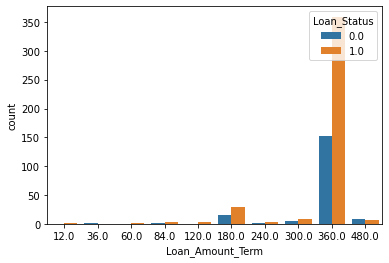

In [32]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

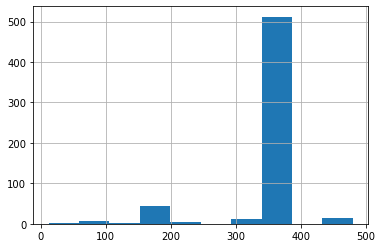

In [33]:
df['Loan_Amount_Term'].hist()

In [34]:
# Loan Term not adding a lot of value as 85% of values are same
df.drop('Loan_Amount_Term',axis=1,inplace=True)

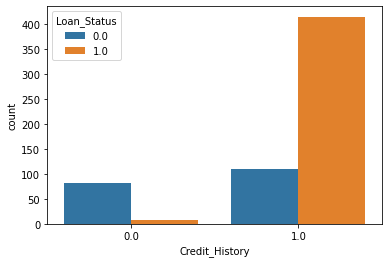

In [35]:
sns.countplot(x='Credit_History',data=df,hue='Loan_Status')

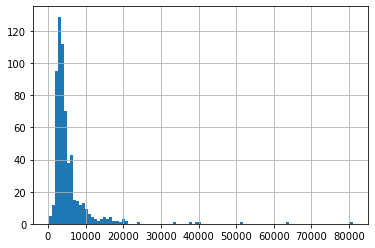

In [36]:
df['ApplicantIncome'].hist(bins=100)
# Qn - Outliers - Makes sense as Economic inequality in the world

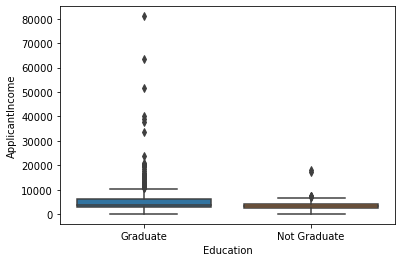

In [37]:
sns.boxplot(x='Education',y='ApplicantIncome',data=df) 


**Insights:**
- `Loan_Amount_Term is categorical as it has only 10 unique values`
- `Loan_ID column has all unique values and it not a continous column so it has 614 categories one for each row and that would not provide any info to the algorithm`

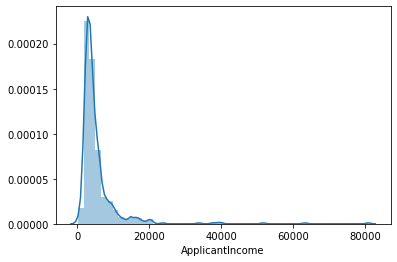

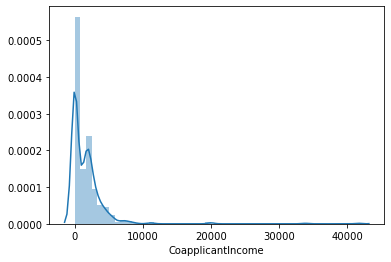

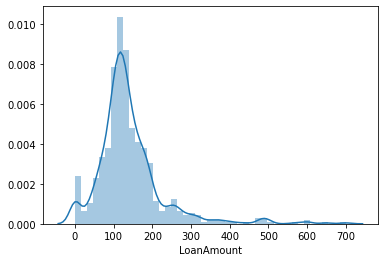

In [38]:
# distplot for continous columns
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.distplot(df[i])
    plt.show()

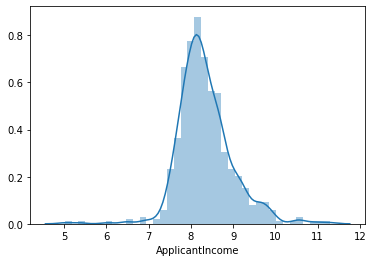

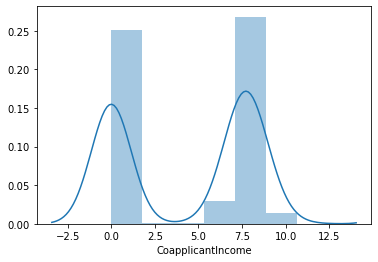

In [39]:
# distplot for continous columns with distribution
for i in ['ApplicantIncome','CoapplicantIncome']:
    sns.distplot(np.log(df[i]+1))
    plt.show()
# Bi modal distribution with 0 & 7.5 peaks for Coapplicant income    

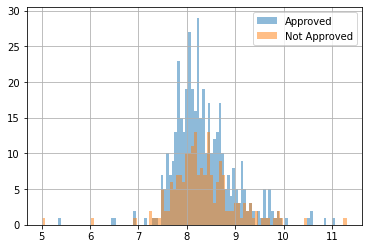

In [40]:
# Compare
np.log(df['ApplicantIncome'][df.Loan_Status==1]).hist(bins=100,alpha =0.5,label='Approved')
np.log(df['ApplicantIncome'][df.Loan_Status==0]).hist(bins=100,alpha =0.5,label='Not Approved')
plt.legend()


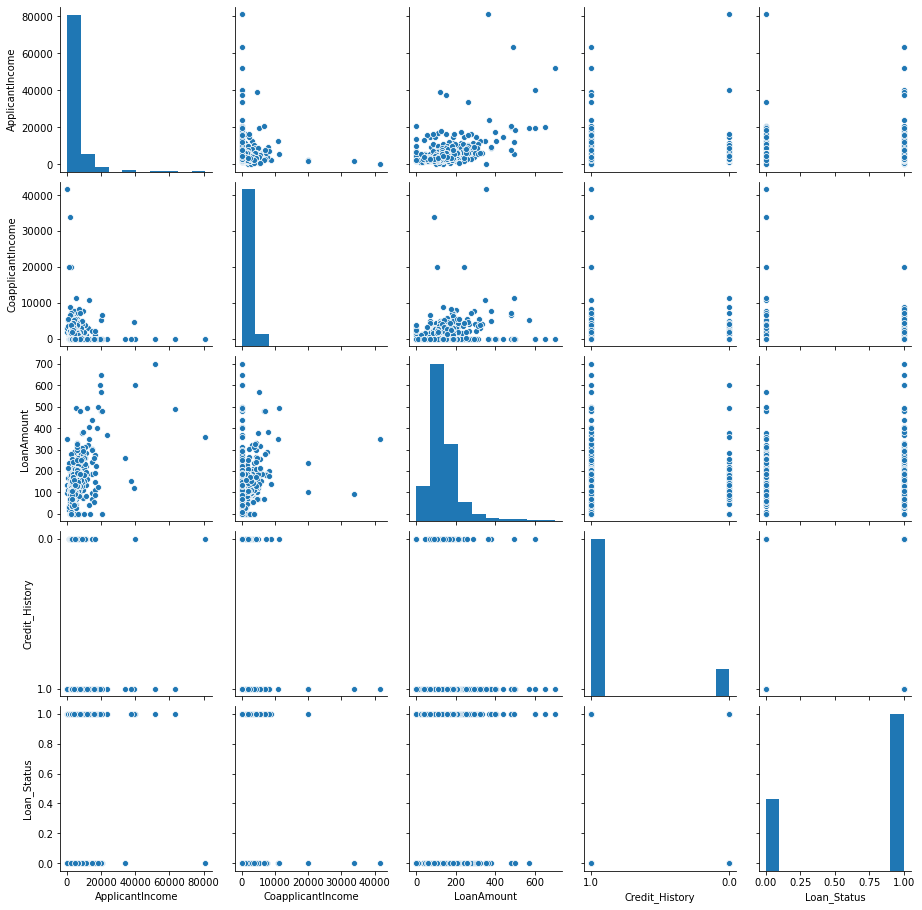

In [41]:
sns.pairplot(df)

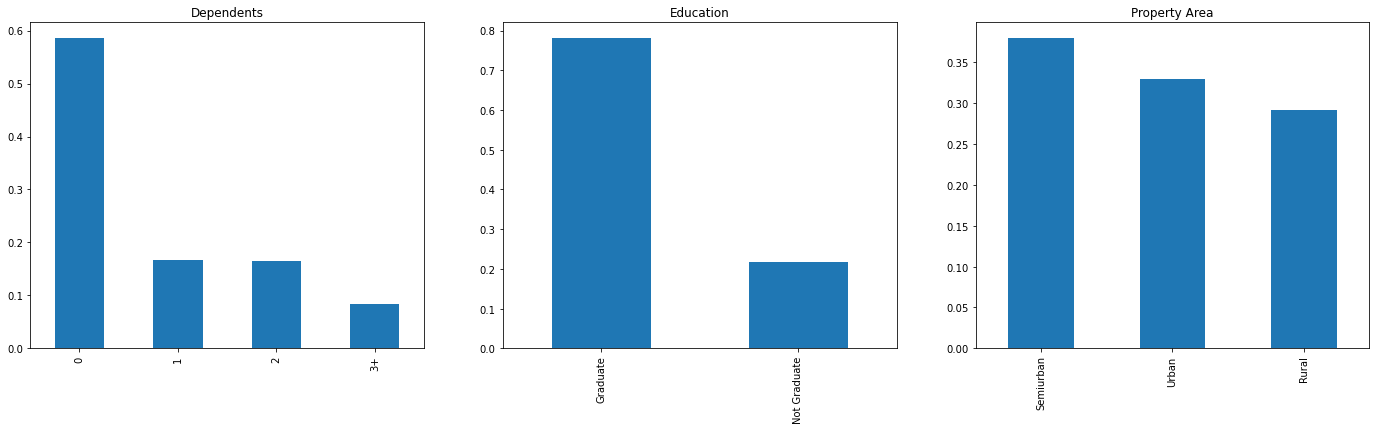

In [42]:
# Most people graduates and come from suburban area
plt.figure(1)
plt.subplot(131)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
df['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(133)
df['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property Area')



**Insights:**
- `As you can see all the three are skewed but we won't treat it as bank are supposed to have skewed applicants, If we treat the data here it will increase bias`

**Insights:**
- `Loan_Amount_Term most of the values are 360, and rest categories have a very small percentage. So it won't add much value to create dummies of these columns`

In [43]:
# Qn enumerate do ?
for i,j in enumerate(['a','b','c']):
    print(i, '+', j)
    
#iteritems()   

0 + a
1 + b
2 + c


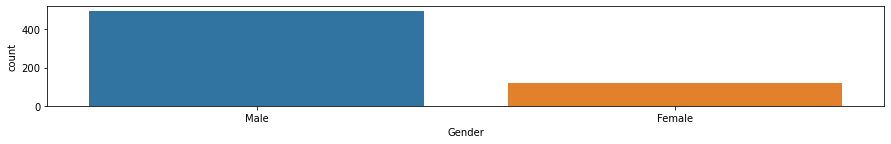

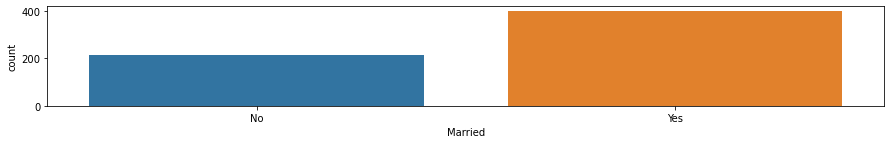

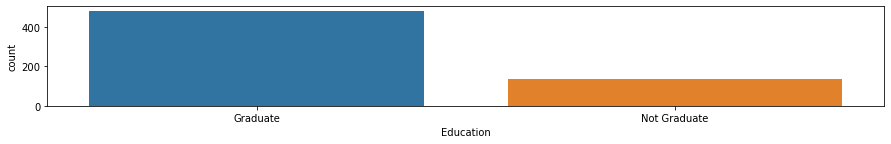

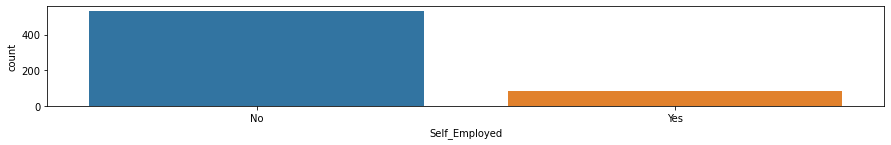

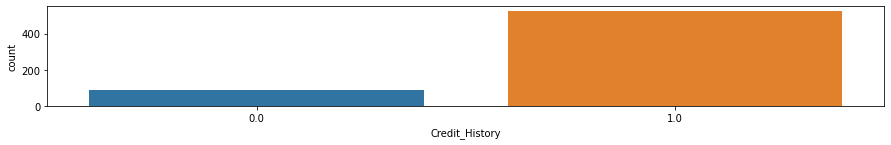

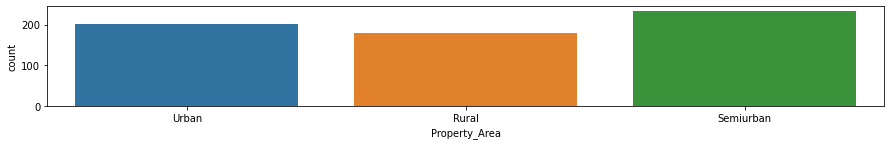

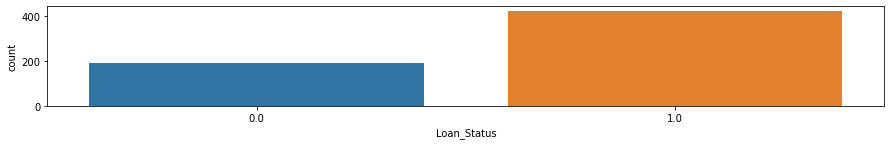

In [44]:
# Plot all the graphs together using subplot
# Using subplots  
for i,name in enumerate(['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']):
     plt.figure(figsize=(15,15))
     plt.subplot(7, 1, i+1)
     sns.countplot(df[name])
    
plt.show()

In [45]:
# Similar counts as above use value counts
for i in list(df.columns[df.dtypes=='object']):   # checking value counts of all object type columns
    print(df[i].value_counts(normalize=True)*100)
    print()

Male      80.781759
Female    19.218241
Name: Gender, dtype: float64

Yes    65.14658
No     34.85342
Name: Married, dtype: float64

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

No     86.644951
Yes    13.355049
Name: Self_Employed, dtype: float64

1.0    85.504886
0.0    14.495114
Name: Credit_History, dtype: float64

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64



In [46]:
#Check for data imbalance problem
df['Loan_Status'].value_counts(normalize=True)*100


1.0    68.729642
0.0    31.270358
Name: Loan_Status, dtype: float64

In [47]:
# Let us look at the target column which is 'Loan_Status' to understand how the data is distributed amongst the various values
df.groupby(["Loan_Status"]).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_Status,,,
0.0,5446.078125,1877.807292,142.557292
1.0,5384.068720,1504.516398,140.533175


In [48]:
df.groupby(["Loan_Status"]).median()

,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_Status,,,
0.0,3833.5,268.0,126.5
1.0,3812.5,1239.5,125.0


**Insights:**
- `There is a slight imbalance in the data but no need to treat it`

**Insights:**
- `No major difference in case of ApplicantIncome and LoanAmount values w.r.t. target variable`

- `But CoapplicantIncome is higher for people who take loan`

## <a id = "link4"></a> Bivariate Analysis

**Think about it:**

- In this case-study, we are going to apply Logistic Regression.
- But even before we apply, let's have a look at the data to see how each attribute is different when loan status is yes or not.
- To check it, we ll have to use groupby and crosstabs.

**Think about it**

- Please try to look at the outputs of the codes given below and see if there is any relationship or not

In [49]:
#Testing our diff analysis - Gender distribution similar across both 0 & 1
pd.crosstab(df['Gender'],df['Loan_Status'],normalize='index')

Loan_Status,0.0,1.0
Gender,,
Female,0.322034,0.677966
Male,0.310484,0.689516


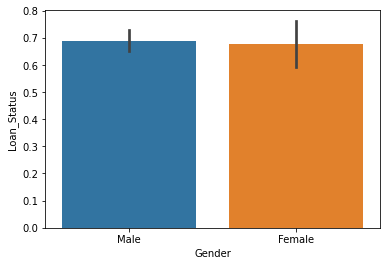

In [50]:
# Gender and Loan Status relationships
sns.barplot(x='Gender',y='Loan_Status',data=df)


In [51]:
pd.crosstab(df['Married'],df['Loan_Status'],normalize='index')

Loan_Status,0.0,1.0
Married,,
No,0.369159,0.630841
Yes,0.282500,0.717500


In [52]:
pd.crosstab(df['Education'],df['Loan_Status'],normalize='index')

Loan_Status,0.0,1.0
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


In [53]:
pd.crosstab(df['Self_Employed'],df['Loan_Status'],normalize='columns')

Loan_Status,0.0,1.0
Self_Employed,,
No,0.864583,0.867299
Yes,0.135417,0.132701


**Insights:**
- `Self Employed people have same distribution, We should check how this feature influences final model using coefficients`

In [54]:
df_temp = pd.crosstab(df['Property_Area'],df['Loan_Status'],normalize='columns')
df_temp["total"] = df_temp[0.0] + df_temp[1.0]
df_temp

Loan_Status,0.0,1.0,total
Property_Area,,,
Rural,0.359375,0.260664,0.620039
Semiurban,0.281250,0.424171,0.705421
Urban,0.359375,0.315166,0.674541


**Insights:**
- `Semi Urban people are taking more loans`

In [55]:
pd.crosstab(df['Dependents'],df['Loan_Status'],normalize='index')

Loan_Status,0.0,1.0
Dependents,,
0,0.313889,0.686111
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


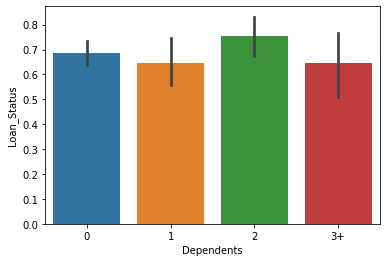

In [56]:
sns.barplot(x='Dependents',y='Loan_Status',data=df)
# You can use ANOVA analysis to figure out the means of each class are different

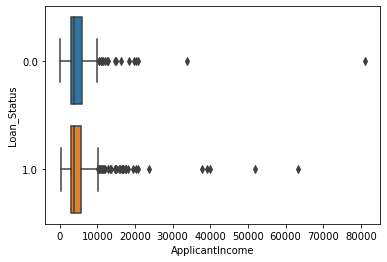

In [57]:
# Applicant income distribution across Loan Status column
sns.boxplot(x='ApplicantIncome',y='Loan_Status',data=df,orient='h')#.set_yscale('log')


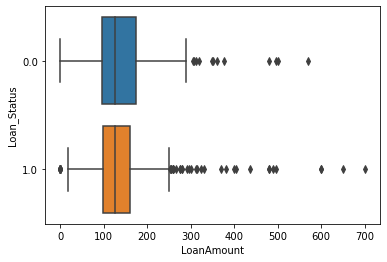

In [58]:
# Loan Amount distribution across Loan Status column
sns.boxplot(x='LoanAmount',y='Loan_Status',data=df,orient='h')#.set_yscale('log')


In [59]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,0.687296
std,6109.041673,2926.248369,88.340630,0.463973
min,150.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,0.000000
50%,3812.500000,1188.500000,125.000000,1.000000
75%,5795.000000,2297.250000,164.750000,1.000000
max,81000.000000,41667.000000,700.000000,1.000000


In [60]:
# Bucketing to visualize data
df['ApplicantIncome_Bucket'] = pd.DataFrame(pd.cut(df['CoapplicantIncome'],[0.0,300.0,5000.0,42000.0],labels=['Low','Medium','High']))
df['CoapplicantIncome_Bucket'] = pd.DataFrame(pd.cut(df['CoapplicantIncome'],[-1.0,1000.0,3000.0,42000.0],labels=['Low','Medium','High']))
df['TotalIncome_Bucket'] =  pd.DataFrame(pd.cut(df['ApplicantIncome']+df['CoapplicantIncome'],[-0.1,2500,4000,6000,81000],labels=['Low','Medium','High','Very High']))

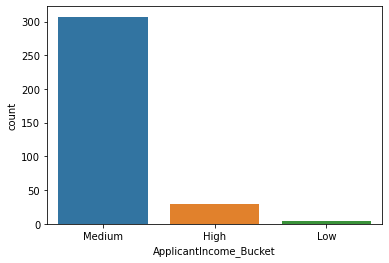

In [61]:
sns.countplot(df['ApplicantIncome_Bucket'])

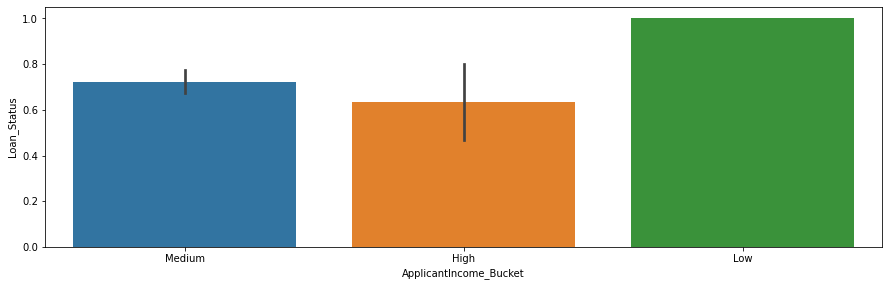

In [62]:
# Looks like Applicant Income as low has highest proportion of approved but doesnt take into account coapplicant income
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
sns.barplot(df['ApplicantIncome_Bucket'],df['Loan_Status'].astype(float))

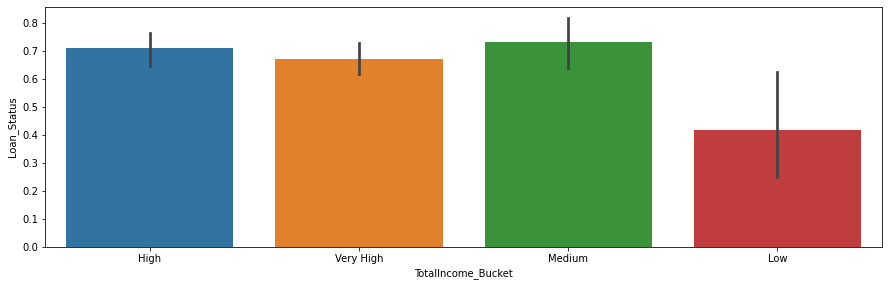

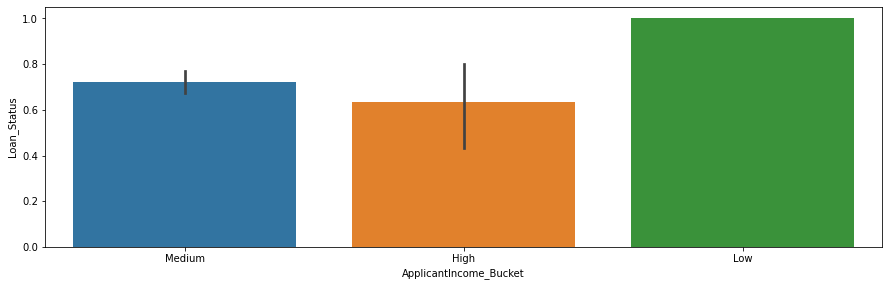

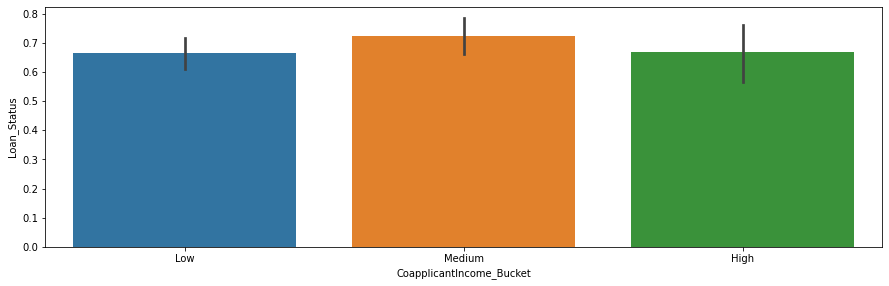

In [63]:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
sns.barplot(df['TotalIncome_Bucket'],df['Loan_Status'].astype(float))


plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
sns.barplot(df['ApplicantIncome_Bucket'],df['Loan_Status'].astype(float))

plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
sns.barplot(df['CoapplicantIncome_Bucket'],df['Loan_Status'].astype(float))


In [64]:
df['CoapplicantIncome'].value_counts(normalize=True)
# Lots of 0s, 

0.0       0.444625
1666.0    0.008143
2083.0    0.008143
2500.0    0.008143
1750.0    0.004886
            ...   
7166.0    0.001629
2138.0    0.001629
2166.0    0.001629
3541.0    0.001629
3021.0    0.001629
Name: CoapplicantIncome, Length: 287, dtype: float64

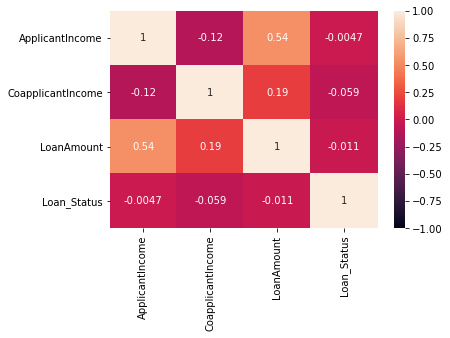

In [65]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)
# Loan Amt and Applicant Income correlated

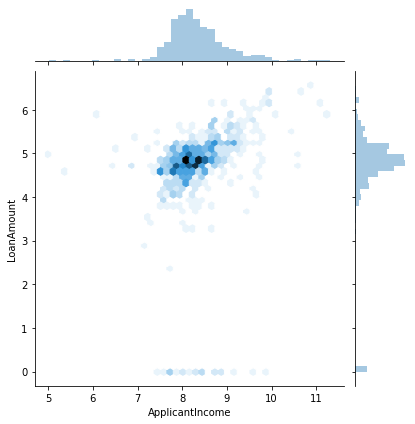

In [66]:
sns.jointplot(np.log(df['ApplicantIncome']),np.log(df['LoanAmount']+1),kind='hex')
# Large amount to Income

**Insights:**
- `Number of dependents have no relationship with Loan_status therfore Dependents is a nominal categorical variable`

In [67]:
# Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = df['Loan_Status'].value_counts(normalize=True)
print(prop_Y)

1.0    0.687296
0.0    0.312704
Name: Loan_Status, dtype: float64


Text(0.5, 1.0, 'Loan Status')

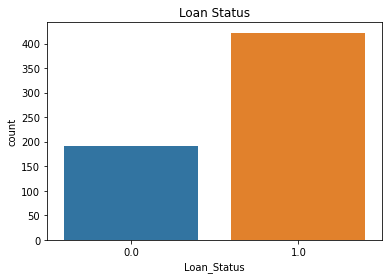

In [68]:
sns.countplot(x='Loan_Status',data=df)
plt.title('Loan Status')

In [69]:
# Let us look at the target column Loan Status to understand how data is distributed among various values
df.groupby(["Loan_Status"]).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_Status,,,
0.0,5446.078125,1877.807292,142.557292
1.0,5384.068720,1504.516398,140.533175


In [70]:
# Lets build some contigency tables - examine relationship between discrete variables due to imbalance 
# You can Chi Sq tests for statistical significance further
# Based on example below, we can see the relationship of credit history is valid with loan status even with other variables included
def get_ct(df,var):
    ct_res = pd.crosstab(df[var],df['Loan_Status'],margins=True)
    ct_res['Approved (%)'] = round(ct_res[1.0]/ct_res['All']*100,2)
    return ct_res.drop(columns='All')

get_ct(df,'Credit_History')
# Check for co-founding variables.
# Stratified contigency tables, add more variable - trend applies even when we seggrgate data based on third var

Loan_Status,0.0,1.0,Approved (%)
Credit_History,,,
0.0,82,7,7.87
1.0,110,415,79.05
All,192,422,68.73


In [71]:
def get_sct(df,stra_var):
    ct_res=pd.crosstab(index=[df[stra_var],df.Credit_History],columns=df.Loan_Status,margins=True)
    ct_res['Approved (%)'] = round(ct_res[1.0]/ct_res['All']*100,2)
    return ct_res.drop(columns='All').drop('All',level=0)




In [72]:
get_sct(df,'Education')

Loan_Status                  0.0  1.0  Approved (%)
Education    Credit_History                        
Graduate     0.0              57    6          9.52
             1.0              83  334         80.10
Not Graduate 0.0              25    1          3.85
             1.0              27   81         75.00

In [73]:
get_sct(df,'Married')

Loan_Status             0.0  1.0  Approved (%)
Married Credit_History                        
No      0.0              29    3          9.38
        1.0              50  132         72.53
Yes     0.0              53    4          7.02
        1.0              60  283         82.51

In [74]:
get_sct(df,'Dependents')
# Nore propotion of credit history with laon so trend is there
# Continually ask which factors are for confusion, asking the right questions as get along, EDA - 

Loan_Status                0.0  1.0  Approved (%)
Dependents Credit_History                        
0          0.0              47    3          6.00
           1.0              66  244         78.71
1          0.0              13    1          7.14
           1.0              23   65         73.86
2          0.0              13    1          7.14
           1.0              12   75         86.21
3+         0.0               9    2         18.18
           1.0               9   31         77.50

## <a id = "link6"></a> Model building using Logistic Regression from Sklearn 

We will use the sklearn library to build the model and make predictions

In [75]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status', 'ApplicantIncome_Bucket',
       'CoapplicantIncome_Bucket', 'TotalIncome_Bucket'],
      dtype='object')

In [76]:
## Define X and Y variables
X = df.drop(['Loan_Status','ApplicantIncome_Bucket','CoapplicantIncome_Bucket', 'TotalIncome_Bucket'], axis=1)
Y = df['Loan_Status'].astype('category')     


In [77]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)


In [78]:
print(X.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes', 'Credit_History_1.0',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


**Think about it**

- How does drop first help and why we do it
  - It reduces the number of columns and hence increases the computational time.

In [79]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)
#mORE TRAINING data better model, more test data - less variability in your results - find balance between the two, 

**Think about it**

- Why do we use random State
  - Sklearn randomly shuffles the data so we get a slightly different answer. If we fix the random state and re-run the code then all the scores will stay the same for that random state.
  - If we do not use random state our metrics will slightly differ in every run.

In [80]:
logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(random_state=7)

In [81]:
# Using the concept of threshold to make predictions
#y_predict = logreg.predict(X_test)              # Predicting the target variable on test data
#y_predict

In [82]:
logreg.predict_proba(X_test)

array([[0.808339  , 0.191661  ],
       [0.23427013, 0.76572987],
       [0.83762838, 0.16237162],
       [0.38002298, 0.61997702],
       [0.23625972, 0.76374028],
       [0.79828318, 0.20171682],
       [0.24993863, 0.75006137],
       [0.12512821, 0.87487179],
       [0.28474371, 0.71525629],
       [0.23593782, 0.76406218],
       [0.20145   , 0.79855   ],
       [0.24961181, 0.75038819],
       [0.22220825, 0.77779175],
       [0.19911422, 0.80088578],
       [0.07942159, 0.92057841],
       [0.12554505, 0.87445495],
       [0.17890617, 0.82109383],
       [0.12938924, 0.87061076],
       [0.61175323, 0.38824677],
       [0.17511364, 0.82488636],
       [0.42985576, 0.57014424],
       [0.92833599, 0.07166401],
       [0.27937996, 0.72062004],
       [0.27158189, 0.72841811],
       [0.26086503, 0.73913497],
       [0.3138347 , 0.6861653 ],
       [0.14315507, 0.85684493],
       [0.17162907, 0.82837093],
       [0.28272618, 0.71727382],
       [0.45672917, 0.54327083],
       [0.

In [83]:
# Use the concept of threhold as below 
threshold = 0.75
y_predict = np.where(logreg.predict_proba(X_test)[:,1]>threshold,1,0)
y_predict

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1])

In [84]:
# Observe the predicted and observed classes in a dataframe.
z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Observed Loan Status,Predicted Loan Status
220,2221.0,0.0,60.0,1,1,0,0,0,0,0,0,0,1,0.0,0
109,2071.0,754.0,94.0,1,1,0,0,1,1,0,1,1,0,1.0,1
569,3166.0,2064.0,104.0,1,1,0,0,0,0,0,0,0,1,0.0,0
330,4384.0,1793.0,117.0,1,0,1,0,0,0,0,1,0,1,1.0,0
407,2213.0,0.0,66.0,0,0,0,0,0,1,0,1,0,0,1.0,1


In [85]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8088578088578089

Testing accuracy 0.8108108108108109

Confusion Matrix


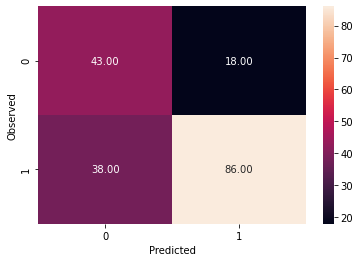

None

Recall: 0.6935483870967742

Precision: 0.8269230769230769

F1 Score: 0.7543859649122807

Roc Auc Score: 0.6992332099418298


In [86]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))


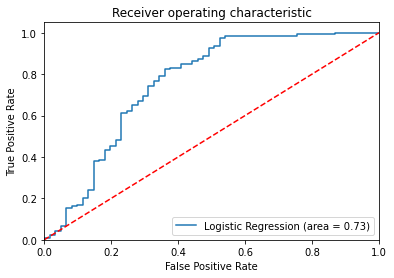

In [87]:
# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# If i have a  model where we always predict positive reults - 100% TPR, 100% FPR 
# If we always predict 0-> 0% TPR , 0% FPR; BEST MODEL 100% TPR, 0% FPR, - better we have , better the model.


In [88]:
# get the best threshold (Very relevant to Business Use Case)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.702975


Logistic: f1=0.754 auc=0.798


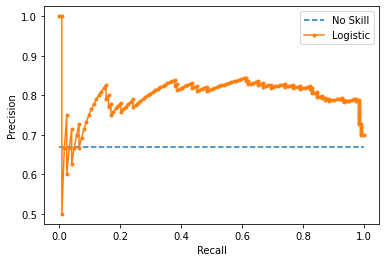

In [89]:
# Precision Recall Curve

# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])
# calculate scores
lr_f1, lr_auc = f1_score(y_test,y_predict), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [90]:
# convert to f score
fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.827546, F-Score=0.875


In [91]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
10,Credit_History_1.0,2.97
8,Education_Not Graduate,0.82
3,Gender_Male,0.79
4,Married_Yes,0.46
6,Dependents_2,0.44
11,Property_Area_Semiurban,0.39
5,Dependents_1,0.37
12,Property_Area_Urban,0.13
9,Self_Employed_Yes,0.03
7,Dependents_3+,0.01


In [92]:
X_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes', 'Credit_History_1.0',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [93]:
#X_train, X_test, y_train, y_test
# Build the logistic regression models using statsmodel
import statsmodels.api as sm
logit = sm.Logit(y_train,sm.add_constant(X_train))
lg = logit.fit()



Optimization terminated successfully.
         Current function value: 0.452065
         Iterations 6


In [94]:
# Summary of logistic regression with threhold 0.5
#stats.chisqprob = lambda chisq,df: stats.chi2.sf(chisq,df)
print(lg.summary())
# Interpret results, Credit History goes up by 1, on avg, log of odds go up by 4.56 - sign imp for coeff, 
# Get pseudo R^2 indicate 28% of uncertainity of the intercept only model explained by full model

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  429
Model:                          Logit   Df Residuals:                      415
Method:                           MLE   Df Model:                           13
Date:                Sat, 03 Oct 2020   Pseudo R-squ.:                  0.2653
Time:                        20:52:02   Log-Likelihood:                -193.94
converged:                       True   LL-Null:                       -263.98
Covariance Type:            nonrobust   LLR p-value:                 2.020e-23
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.7369      0.627     -4.364      0.000      -3.966      -1.508
ApplicantIncome         -2.035e-05   2.94e-05     -0.691      0.489    -7.8e-05    3.73e-05


In [95]:
# Manual calculation of Odds Ratio & Prob from Coefficients
#Calculate Odds ratio from coff using formula
#odds ratio = exp(coeff)
#Calculate prob from odds ratio using formula
#prob = odds / (1+odds)

In [96]:
#calct odds ratio, prob
##create dataframe to collate odds ration, prob and p value of coeff
lgcoef = pd.DataFrame(lg.params,columns=['coef'])
lgcoef.loc[:,"Odds_ratio"]=np.exp(lgcoef.coef)
lgcoef['probability']=lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format ='{:.2f}'.format


In [97]:
# Filter by significant p value(p val < 0.05) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio",ascending=False)
pval_filter=lgcoef['pval']<=0.05
lgcoef[pval_filter]


,coef,Odds_ratio,probability,pval
Credit_History_1.0,3.94,51.19,0.98,0.00
Property_Area_Semiurban,0.80,2.23,0.69,0.02
Married_Yes,0.70,2.01,0.67,0.02
CoapplicantIncome,-0.00,1.00,0.50,0.04
const,-2.74,0.06,0.06,0.00


In [98]:
# Check for Multicolliniarity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'ApplicantIncome_Bucket','CoapplicantIncome_Bucket', 'TotalIncome_Bucket'],axis=1).values, i) for i in range(df.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'ApplicantIncome_Bucket','CoapplicantIncome_Bucket', 'TotalIncome_Bucket'],axis=1).shape[1])]
vif['variable'] = df.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'ApplicantIncome_Bucket','CoapplicantIncome_Bucket', 'TotalIncome_Bucket'],axis=1).columns
vif.sort_values(by='VIF',ascending=False)

,VIF,variable
2,4.23,LoanAmount
0,2.69,ApplicantIncome
3,1.96,Loan_Status
1,1.43,CoapplicantIncome


In [99]:
#Grid Search - Bonus work to run logistic regression across multiple parameters
#X_train, X_test, y_train, y_test
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print('Best Solver : ' + str(grid_clf_acc.best_params_))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.8108108108108109
Precision Score : 0.7870967741935484
Recall Score : 0.9838709677419355
F1 Score : 0.8745519713261649
Best Solver : {'solver': 'newton-cg'}


array([[ 28,  33],
       [  2, 122]], dtype=int64)

## <a id = "link8"></a>Business Insights 

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that home loan will be granted and the customer was eligibile for loan

*False Positive (observed=0,predicted=1):*

Predicted that home loan will be granted and the customer was not eligibile for loan

*True Negative (observed=0,predicted=0):*

Predicted that home loan will not be granted and the customer was not eligibile for loan

*False Negative (observed=1,predicted=0):*

Predicted that home loan will not be granted and the customer was eligibile for loan

##### `Important Features`

"Credit_History", "Married", "Property_Area_Semiurban", "Gender", "Dependents_2"

seems to be top 5 features which influence the model's output. Based on the coefficients value.


##### `Important Metric`

Here the bank wants to give loan to the people who are eligible for the home loan i.e. **less number of False Positive**, if FP is high bank would lose money. So that the bank doesn't lose money on the people who are not eligible for the loan. Hence **Precision is the important metric**.

In case of False negative bank will lose few customers but that okay because the bank would want to retain money more than customers who are not eligible for loan.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who is eligible for home loan. They can use the model for upcoming customers.

## Appendix:

- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **boxplot** : Draw a box plot to show distributions with respect to categories.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LogisticRegression** : Logistic Regression (aka logit, MaxEnt) classifier.

- **yellowbrick** : Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it  uses Matplotlib